<a href="https://colab.research.google.com/github/catalina-duran/amigo-secreto/blob/main/CHALLENGE%20ALURA%20Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)


# Añadir columna con nombre de tienda
tienda_1['tienda'] = 'Tienda 1'
tienda_2['tienda'] = 'Tienda 2'
tienda_3['tienda'] = 'Tienda 3'
tienda_4['tienda'] = 'Tienda 4'

tienda_1.head()
# Unir los dataframes



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [25]:
df_total = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

df_total.head()

df_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [28]:
df_total = df_total.drop_duplicates()
fecha_cols = ['shipping_limit_date', 'order_delivered_customer_date']
for col in fecha_cols:
    if col in df_total.columns:
        df_total[col] = pd.to_datetime(df_total[col], errors='coerce')
df_total.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#**INGRESOS DE LAS TIENDAS**

In [40]:
ingresos_por_tienda = df_total.groupby('tienda')['Precio'].sum().sort_values(ascending=False)
print("Ingresos totales por tienda:\n")
print(ingresos_por_tienda)



Ingresos totales por tienda:

tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


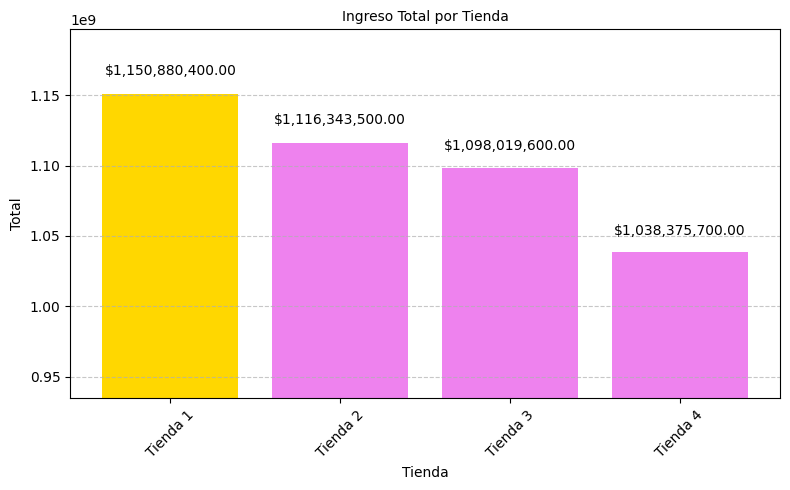

In [72]:
ingresos_ordenados = ingresos_por_tienda.sort_values(ascending=False)
tienda_max = ingresos_ordenados.idxmax()

colores = ['gold' if tienda == tienda_max else 'violet' for tienda in ingresos_ordenados.index]

plt.figure(figsize=(8, 5))
bars = plt.bar(ingresos_ordenados.index, ingresos_ordenados.values, color=colores)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + yval*0.01,
             f"${yval:,.2f}",
             ha='center', va='bottom', fontsize=10)

plt.title('Ingreso Total por Tienda', fontsize=10)
plt.xlabel('Tienda')
plt.ylabel('Total')
plt.ylim(ingresos_ordenados.min()*0.90, ingresos_ordenados.max()*1.04)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#**CATEGORÍAS MÁS VENDIDAS POR TIENDA**

In [39]:
categorias_mas_vendidas = df_total['Categoría del Producto'].value_counts()
print("\n🏷️ Categorías más vendidas:\n")
print(categorias_mas_vendidas.head(10))



🏷️ Categorías más vendidas:

Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


/tmp/ipython-input-50-4033557537.py:23: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


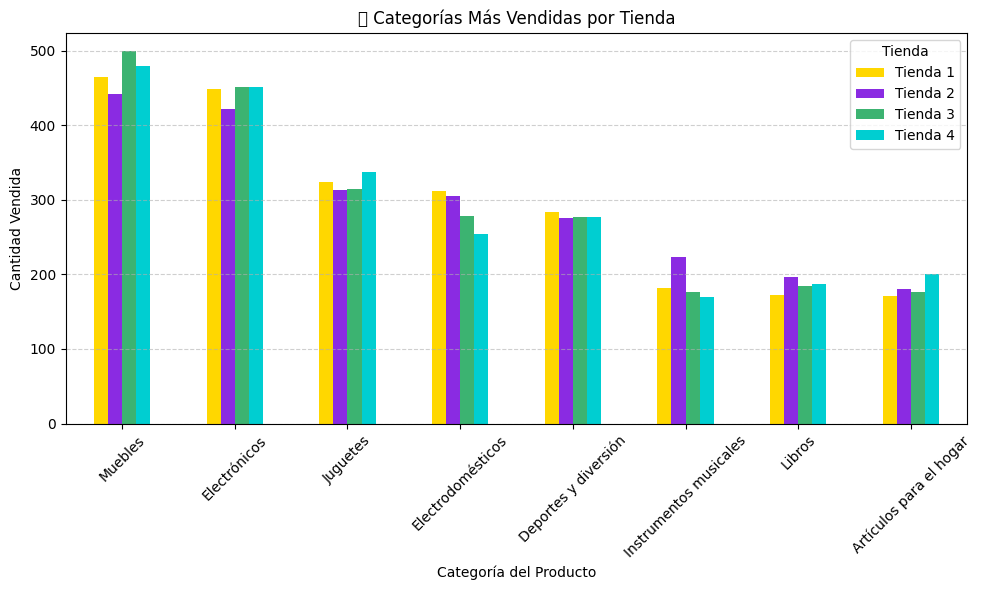

In [50]:
ventas_categoria = df_total.groupby(['tienda', 'Categoría del Producto']).size().reset_index(name='ventas')

pivot = ventas_categoria.pivot(index='Categoría del Producto', columns='tienda', values='ventas').fillna(0)
top_categorias = df_total['Categoría del Producto'].value_counts().head(10).index
pivot = pivot.loc[top_categorias]

colores = {
    'Tienda 1': '#FFD700',
    'Tienda 2': '#8A2BE2',
    'Tienda 3': '#3CB371',
    'Tienda 4': '#00CED1'
}


pivot.plot(kind='bar', figsize=(10, 6), color=[colores[col] for col in pivot.columns])

plt.title('📦 Categorías Más Vendidas por Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

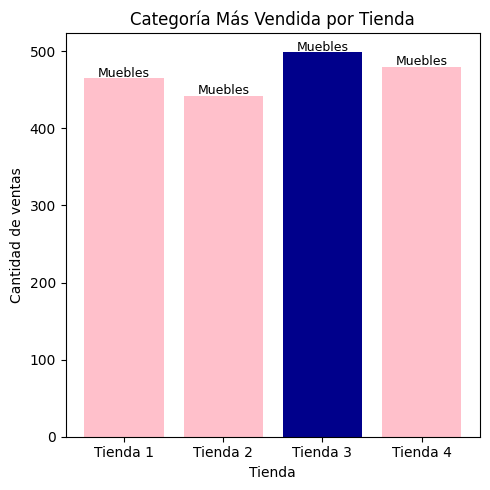

In [71]:
indice_max = categoria_top['ventas'].idxmax()
tienda_max = categoria_top.loc[indice_max, 'tienda']

colores = ['darkblue' if tienda == tienda_max else 'pink' for tienda in categoria_top['tienda']]
plt.figure(figsize=(5, 5))
plt.bar(categoria_top['tienda'], categoria_top['ventas'], color=colores)
plt.title('Categoría Más Vendida por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
for i, row in categoria_top.iterrows():
    plt.text(row['tienda'], row['ventas'] + 2, row['Categoría del Producto'], ha='center', fontsize=9)

plt.tight_layout()
plt.show()


#PROMEDIO TIENDAS

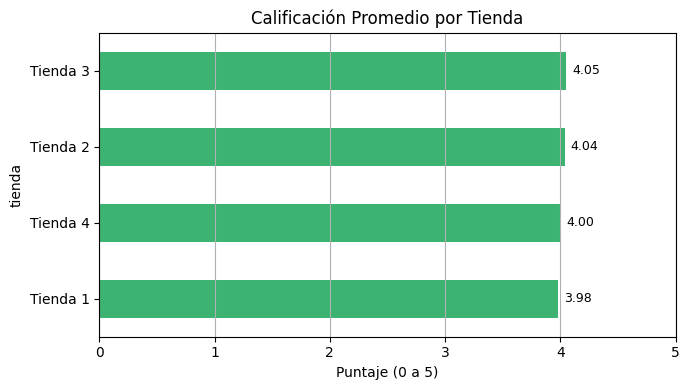

In [91]:
plt.figure(figsize=(7, 4))
bars = calificacion_promedio.sort_values().plot(kind='barh', color='mediumseagreen')

for i, v in enumerate(calificacion_promedio.sort_values()):
    plt.text(v + 0.05, i, f"{v:.2f}", va='center', fontsize=9)

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Puntaje (0 a 5)')
plt.xlim(0, 5)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


#**PRODUCTOS MÁS VENDIDOS**

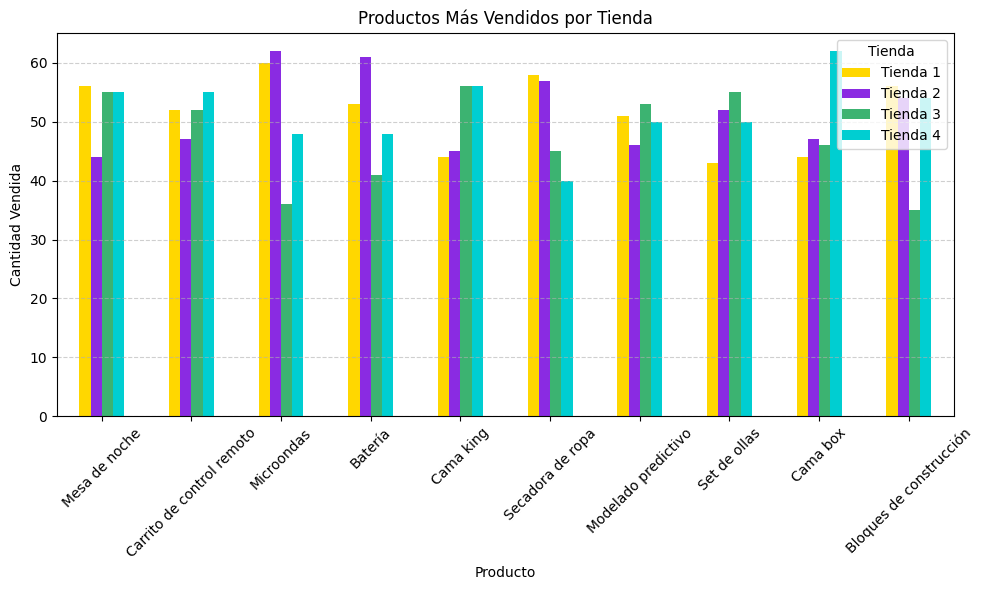

In [103]:
ventas_producto = df_total.groupby(['tienda', 'Producto']).size().reset_index(name='ventas')

pivot_productos = ventas_producto.pivot(index='Producto', columns='tienda', values='ventas').fillna(0)

top_productos = df_total['Producto'].value_counts().head(10).index
pivot_productos = pivot_productos.loc[top_productos]

colores = {
    'Tienda 1': '#FFD700',
    'Tienda 2': '#8A2BE2',
    'Tienda 3': '#3CB371',
    'Tienda 4': '#00CED1'
}

pivot_productos.plot(kind='bar', figsize=(10, 6), color=[colores[col] for col in pivot_productos.columns])

plt.title('Productos Más Vendidos por Tienda')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-102-87775123.py:18: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


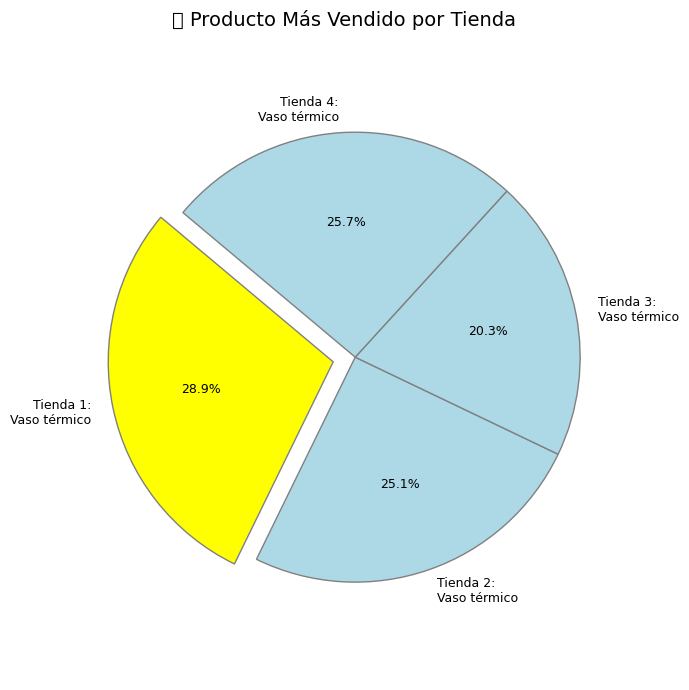

In [102]:
indice_max = producto_top['ventas'].idxmax()
explode = [0.1 if i == indice_max else 0 for i in range(len(producto_top))]
colors = ['yellow' if i == indice_max else 'lightblue' for i in range(len(producto_top))]
labels = [f"{row['tienda']}:\n{row['Producto']}" for _, row in producto_top.iterrows()]

plt.figure(figsize=(7, 7))
plt.pie(producto_top['ventas'],
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        explode=explode,
        colors=colors,
        textprops={'fontsize': 9},
        wedgeprops={'edgecolor': 'grey', 'linewidth': 1})

plt.title('🛍️ Producto Más Vendido por Tienda', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

#**ENVÍO PROMEDIO**

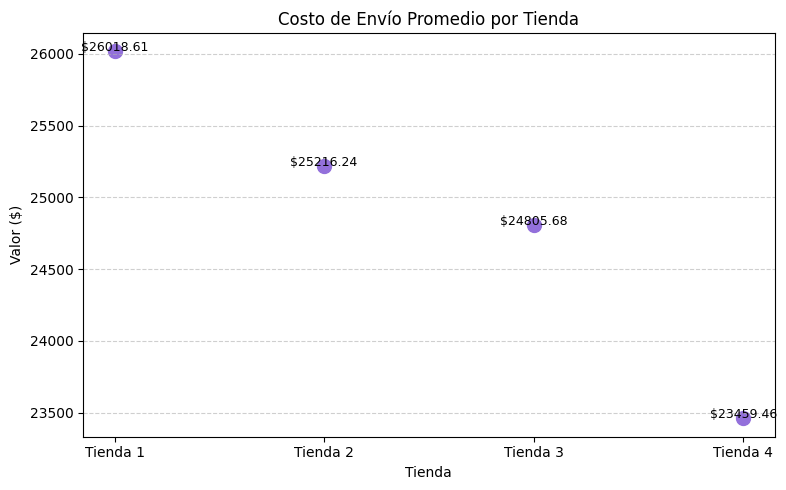

In [107]:
plt.figure(figsize=(8, 5))
plt.scatter(envio_promedio.index, envio_promedio.values, color='mediumpurple', s=100)

for i, (tienda, valor) in enumerate(envio_promedio.items()):
    plt.text(tienda, valor + 0.2, f"${valor:.2f}", ha='center', fontsize=9)

plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Valor ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#**Recomendación para el Sr. João**

Con los resultados obtenidos se puede observar que **la Tienda 3 es la mejor opción** para que el Sr. João venda sus productos.

---
###Observaciones

La tienda 3 no tiene el ingreso más alto ni el costo de envío más bajo, pero aún así mantiene un las ventas por sobre los 1.09, pero se destaca considerablemente en  la calificación promedio de los clientes, lo cual, es super favorable para sus futuras ventas, ya que al tener buenas calificaciones los clientes futuroa podrían preferir la tienda 3 por sobre las demás, esto se podría observar en la cantidad de productos vendidos por tienda, en donde, ,a tienda 3 se destaca en categoría más vendida y producto más vendido.

---

## Conclusión

**Se recomienda al Sr. João vender en la Tienda 3**, ya que ofrece la mejor combinación de:

- **Ventas estables**
- **Clientes satisfechos**
- **Entorno confiable para comercializar sus productos**

La Tienda 3 obtuvo la **mayor puntuación total (4.5)** en una escala de 0 a 5 en el análisis ponderado, lo que respalda esta recomendación de forma clara y objetiva.
